In [1]:
import numpy as np
import qutip
from qze.dimer import get_sim_list
import matplotlib.pyplot as plt
from pickle import load
from scipy import stats

In [2]:
# Statistics
ntraj = 10**3

# Physical parameters.
Nl1 = 16
Nl2 = 31
l1s = np.linspace(0, 1.5, Nl1)
l2s = np.linspace(0, 3, Nl2)
lambdas = [[l1, l2] for l1 in l1s for l2 in l2s]

T = 20
dt = .01
omega_S = 1

t_eval = np.array([0, T])

# solver = "trsolve"
solver = "mcsolve"
# solver = "gutzwiller"

# store_states = False
# compute_eentropy = False
# compute_fidelity = False

no_click = False

psi0 = qutip.tensor(qutip.basis(2, 1), qutip.basis(2, 1))

In [3]:
sim_list = get_sim_list(lambdas,
                        omega_S,
                        psi0,
                        t_eval,
                        ntraj,
                        dt,
                        solver,
                        no_click)

lmbd_1_list = l1s
lmbd_2_list = l2s

In [4]:
data = []

for sim in sim_list:
    f = open(f"data/{str(sim)}.npz", "rb")
    data.append(np.load(f))
    # f.close()

In [5]:
def idx(a, lmbd):
    return np.argmin(np.abs(np.array(a)-lmbd))

In [6]:
eoe_heatmap = np.zeros( (Nl1, Nl2) )
fid_heatmap = np.zeros( (Nl1, Nl2) )

for i, sim in enumerate(sim_list):
    x = idx(lmbd_2_list, sim.lmbd_2)
    y = idx(lmbd_1_list, sim.lmbd_1)

    eoe_heatmap[y, x] = data[i]['entropy_of_entanglement'].mean()
    fid_heatmap[y, x] = data[i]['fidelity'].mean()

## Fidelity and entanglement entropy

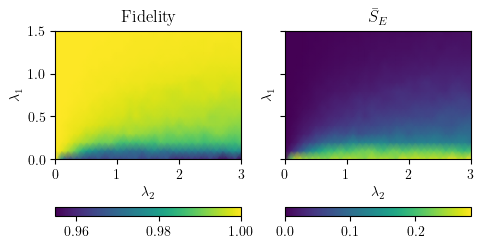

In [12]:
## Fidelity and entanglement entropy
# from cmcrameri import cm
# import cmasher as cmr
# import colorcet as cc

plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x2.mplstyle"])

ylim = (0, 1.5)
xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 1.5, 4)

fig, axs = plt.subplots(1, 2,
                        sharey=True,
                        layout='constrained')

pcm = axs[0].pcolormesh(l2s, l1s, fid_heatmap,
                        shading='gouraud',
                        norm='linear')

axs[0].set_yticks(ylim)

axs[0].set_xlabel(r'$\lambda_2$')
axs[0].set_ylabel(r'$\lambda_1$')
axs[0].set_xticks(xticks)
axs[0].set_yticks(yticks)
axs[0].set_title(r'Fidelity')
fig.colorbar(pcm, ax=axs[0], location='bottom')

pcm = axs[1].pcolormesh(l2s, l1s, eoe_heatmap,
                        shading='gouraud',
                        norm='linear')

axs[0].set_ylim(ylim)

axs[1].set_xlabel(r'$\lambda_2$')
axs[1].set_ylabel(r'$\lambda_1$')
axs[1].set_xticks(xticks)
axs[1].set_yticks(yticks)
axs[1].set_title(r'$\bar{S}_E$')
fig.colorbar(pcm, ax=axs[1], location='bottom')

plt.savefig('plots/dimer/dimer-full-fidelity-eentorpy.pdf')

## Entanglement entropy heatmap

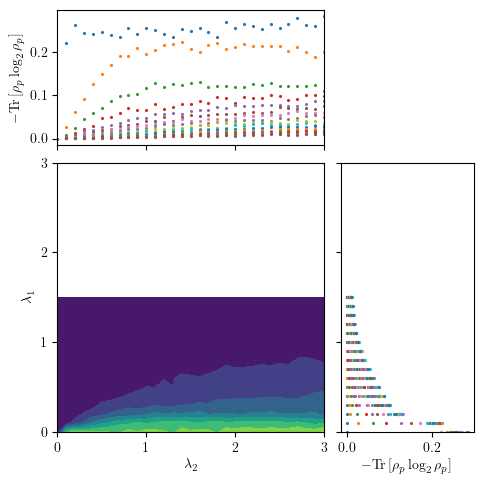

In [8]:
# from cmcrameri import cm
# import cmasher as cmr
# import colorcet as cc

plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_2x2.mplstyle"])

xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 3, 4)

fig = plt.figure(layout='constrained')
gs = fig.add_gridspec(2, 2,
                      width_ratios=(2, 1), height_ratios=(1, 2))#,
                    #   left=0.1, right=0.9, bottom=0.1, top=0.9,
                    #   wspace=0.05, hspace=0.05)

pcol = fig.add_subplot(gs[1, 0])
secx = fig.add_subplot(gs[1, 1], sharey=pcol)
secy = fig.add_subplot(gs[0, 0], sharex=pcol)

pcol.contourf(lmbd_2_list, lmbd_1_list, eoe_heatmap)
# fig.colorbar(pcm, ax=pcol,
#              location='left')
# pcol.set(aspect='equal')
# secx.invert_xaxis()
for i, lin in enumerate(eoe_heatmap.T):
  secx.plot(lin, lmbd_1_list, '.', label=rf'$\lambda_2 = {lmbd_2_list[i]}$')
# secx.legend()
# for col in 
secy.plot(np.array(len(lmbd_1_list)*[lmbd_2_list]).T, eoe_heatmap.T, '.')

pcol.set_xlabel(r'$\lambda_2$')
pcol.set_ylabel(r'$\lambda_1$')
pcol.set_xticks(xticks)
pcol.set_yticks(yticks)

secx.set_xlabel(r'$-\mathrm{Tr}\left[\rho_p \log_2\rho_p\right]$')
secy.set_ylabel(r'$-\mathrm{Tr}\left[\rho_p \log_2\rho_p\right]$')


secx.tick_params(axis='y', labelleft=False)
secy.tick_params(axis='x', labelbottom=False)

plt.savefig('plots/dimer/dimer-full-entanglement-entropy-contour.pdf')

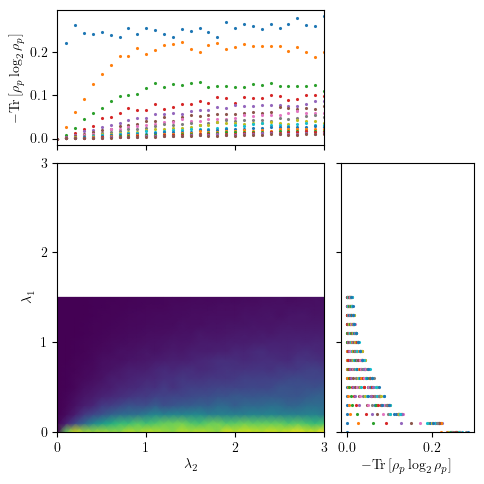

In [9]:
# from cmcrameri import cm
# import cmasher as cmr
# import colorcet as cc

plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_2x2.mplstyle"])

xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 3, 4)

fig = plt.figure(layout='constrained')
gs = fig.add_gridspec(2, 2,
                      width_ratios=(2, 1), height_ratios=(1, 2))#,
                    #   left=0.1, right=0.9, bottom=0.1, top=0.9,
                    #   wspace=0.05, hspace=0.05)

pcol = fig.add_subplot(gs[1, 0])
secx = fig.add_subplot(gs[1, 1], sharey=pcol)
secy = fig.add_subplot(gs[0, 0], sharex=pcol)



pcm = pcol.pcolormesh(lmbd_2_list, lmbd_1_list, eoe_heatmap,
                      shading='gouraud')#,
                    #   cmap=cc.cm.CET_L17)

# fig.colorbar(pcm, ax=pcol,
#              location='left')
# pcol.set(aspect='equal')
# secx.invert_xaxis()
for i, lin in enumerate(eoe_heatmap.T):
  secx.plot(lin, lmbd_1_list, '.', label=rf'$\lambda_2 = {lmbd_2_list[i]}$')
# secx.legend()
# for col in 
secy.plot(np.array(len(lmbd_1_list)*[lmbd_2_list]).T, eoe_heatmap.T, '.')

pcol.set_xlabel(r'$\lambda_2$')
pcol.set_ylabel(r'$\lambda_1$')
pcol.set_xticks(xticks)
pcol.set_yticks(yticks)

secx.set_xlabel(r'$-\mathrm{Tr}\left[\rho_p \log_2\rho_p\right]$')
secy.set_ylabel(r'$-\mathrm{Tr}\left[\rho_p \log_2\rho_p\right]$')


secx.tick_params(axis='y', labelleft=False)
secy.tick_params(axis='x', labelbottom=False)

plt.savefig('plots/dimer/dimer-full-entanglement-entropy-pcolormap.pdf')

## Distributions

In [10]:
# binning_range = [0, 1]
# bins = 20

# fig, axs = plt.subplots(len(lmbd_1_list), len(lmbd_2_list), figsize=(20, 20))
# # fig.suptitle(r"Diagonals, i.e. $P_\infty(\theta_L=\theta_R)$")
# for i, sim in enumerate(sim_list):
 
#     x = idx(lmbd_2_list, sim.lmbd_2)
#     y = len(lmbd_1_list) - 1 - idx(lmbd_1_list, sim.lmbd_1)

#     eoe = data[i]['entropy_of_entanglement']

#     bin_edges = stats.mstats.mquantiles(eoe, np.linspace(0, 1, bins+1))
#     hist, bin_edges = np.histogram(eoe,
#                         bins=bin_edges,
#                         density=True)
#     bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
#     axs[y, x].plot(bin_centers, hist,
#                    '.')
#     axs[y, x].set_xlim( (0, 1) )

#     # axs[y, x].set(xlabel=rf"$Tr[\rho_{\mathrm{L}, \mathrm{R}} \log_2 \rho_{\mathrm{L}, \mathrm{R}}]$", ylabel=rf"Frequency")

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# # for ax in axs.flat:
# #     ax.label_outer()

# # fig.savefig(rf"plots/all-lambdas-diag-full-gutz.pdf")

In [11]:
sl = np.array(sim_list, dtype=object)
sl = np.reshape(sl, (Nl, Nl))
da = [data[i]['entropy_of_entanglement'] for i in range(Nl**2)]
da = np.array(da)
da = np.reshape(da, (Nl, Nl, ntraj))

NameError: name 'Nl' is not defined

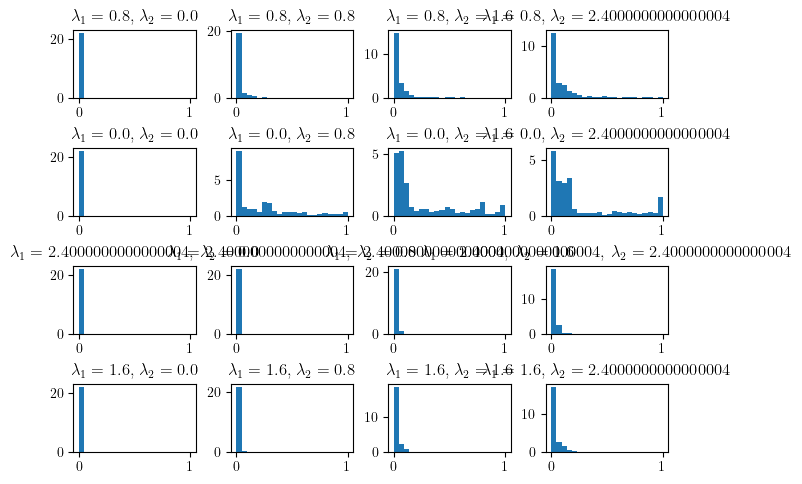

In [ ]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_3x4.mplstyle"])

binning_range = [0, 1]
bins = 22

fig, axs = plt.subplots(len(sl[::4]), len(sl[0][::4]),
                        layout='constrained')
for i, l in enumerate(sl[::4]):
    for j, s in enumerate(l[::4]):
        eoe = da[i, j]

        # bin_edges = stats.mstats.mquantiles(eoe, np.linspace(0, 1, bins+1))
        # hist, bin_edges = np.histogram(eoe,
        #                     bins=bin_edges,
        #                     density=True)
        # bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        # axs[y, x].plot(bin_centers, hist,
        #             '.')
        y = len(sl[::8]) - (1+i)
        axs[y, j].hist(eoe,
                       bins,
                       range=binning_range,
                       density=True)
        axs[y, j].set_title(rf'$\lambda_1 = {s.lmbd_1}$, $\lambda_2 = {s.lmbd_2}$')
        # axs[y, x].set_xlim( (0, 1) )

        # axs[y, x].set(xlabel=rf"$Tr[\rho_{\mathrm{L}, \mathrm{R}} \log_2 \rho_{\mathrm{L}, \mathrm{R}}]$", ylabel=rf"Frequency")

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

fig.savefig(rf"plots/dimer/dimer-full-entanglement-entropy-distributions.pdf")

## Fidelity

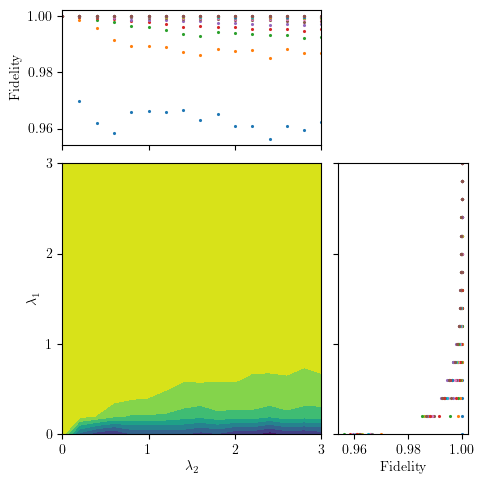

In [ ]:
# from cmcrameri import cm
# import cmasher as cmr
# import colorcet as cc

plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_2x2.mplstyle"])

xticks = np.linspace(0, 3, 4)
yticks = np.linspace(0, 3, 4)

fig = plt.figure(layout='constrained')
gs = fig.add_gridspec(2, 2,
                      width_ratios=(2, 1), height_ratios=(1, 2))#,
                    #   left=0.1, right=0.9, bottom=0.1, top=0.9,
                    #   wspace=0.05, hspace=0.05)

pcol = fig.add_subplot(gs[1, 0])
secx = fig.add_subplot(gs[1, 1], sharey=pcol)
secy = fig.add_subplot(gs[0, 0], sharex=pcol)

pcol.contourf(lmbd_2_list, lmbd_1_list, fid_heatmap)
# fig.colorbar(pcm, ax=pcol,
#              location='left')
# pcol.set(aspect='equal')
# secx.invert_xaxis()
for i, lin in enumerate(fid_heatmap.T):
  secx.plot(lin, lmbd_1_list, '.', label=rf'$\lambda_2 = {lmbd_2_list[i]}$')
# secx.legend()
# for col in 
secy.plot(np.array(len(lmbd_1_list)*[lmbd_2_list]).T, fid_heatmap.T, '.')

pcol.set_xlabel(r'$\lambda_2$')
pcol.set_ylabel(r'$\lambda_1$')
pcol.set_xticks(xticks)
pcol.set_yticks(yticks)

secx.set_xlabel(r'Fidelity')
secy.set_ylabel(r'Fidelity')


secx.tick_params(axis='y', labelleft=False)
secy.tick_params(axis='x', labelbottom=False)

# plt.savefig('plots/dimer/dimer-full-fidelity-contour.pdf')